# Задание

Разработать и обучить нейросеть для кластеризации входных данных

# Ход работы

## Использованные библиотеки

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

## Подготовка тренировочных данных

### Загрузка датасета MNIST

Датасет содержит в себе около 1000 рукописных цифр в формате матриц 28х28 с подписями

In [2]:
# Load MNIST data
train = torchvision.datasets.MNIST('data', train=True, download=True)
test = torchvision.datasets.MNIST('data', train=True, download=True)

### Преобразование данных датасета в нужный формат

In [3]:
# each sample becomes a vector of values 0-1
X_train = train.data.reshape(-1, 784).float() / 255.0
y_train = train.targets
X_test = test.data.reshape(-1, 784).float() / 255.0
y_test = test.targets

### Визуализация части датасета

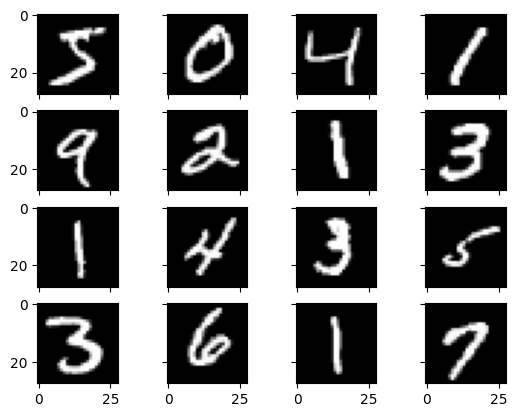

In [4]:
def visualize_image_tensor(ax, tensor):
        ax.imshow(tensor, cmap="gray")

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        visualize_image_tensor(ax[i][j], train.data[4 * i + j])
plt.show()


## Определение класса модели

Модель содержит в себе 2 слоя и 1 ReLU актор

In [5]:
class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 784)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(784, 10)
        
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.layer2(x)
        return x
        
    
model = Baseline()
model

Baseline(
  (layer1): Linear(in_features=784, out_features=784, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=784, out_features=10, bias=True)
)

## Обучение модели

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=100)
 
n_epochs = 101
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    y_pred = model(X_test)
    acc = (torch.argmax(y_pred, 1) == y_test).float().mean()

    if epoch % 10 == 0:
        print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))

Epoch 0: model accuracy 84.27%
Epoch 10: model accuracy 92.26%
Epoch 20: model accuracy 94.14%
Epoch 30: model accuracy 95.25%
Epoch 40: model accuracy 96.10%
Epoch 50: model accuracy 96.69%
Epoch 60: model accuracy 97.17%
Epoch 70: model accuracy 97.56%
Epoch 80: model accuracy 97.83%
Epoch 90: model accuracy 98.10%
Epoch 100: model accuracy 98.31%


## Проверка работоспособности модели

### Определение вспомогательных классов для доступа к изображениям

In [7]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

class TestImage:
    def __init__(self, path):
        self.img = Image.open(path)
        self.data = transform(self.img)[0]


    @property
    def tensor(self):
        tensor = self.data.reshape([1, 784]).float()
        return 1 - tensor / 255

### Проверка модели на тестовых изображениях

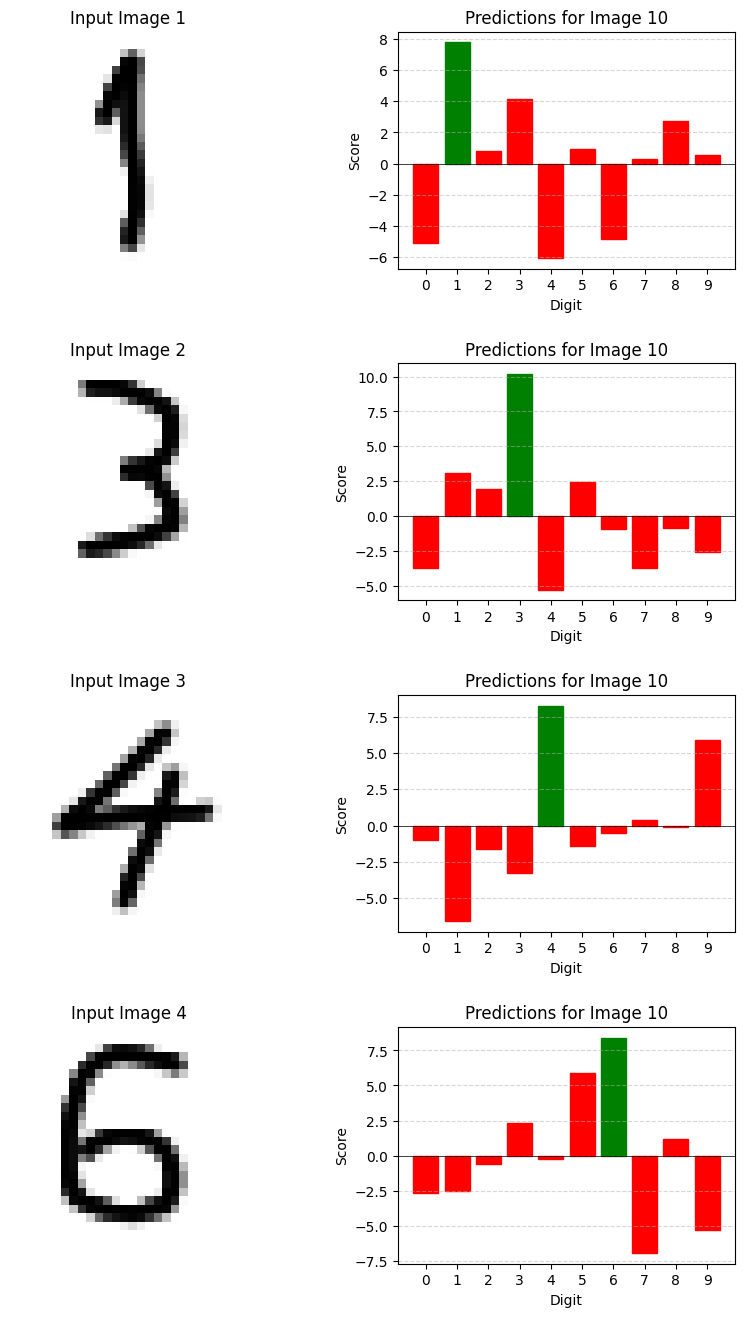

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(10, 16))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

paths = [
    "test-images/1.png",
    "test-images/3.png",
    "test-images/4.png",
    "test-images/6.png",
]

images = [TestImage(p) for p in paths]

for i, (image, ax_row) in enumerate(zip(images, axs)):
    visualize_image_tensor(ax_row[0], image.data)
    ax_row[0].set_title(f"Input Image {i+1}")
    ax_row[0].axis('off')

    pred = model(image.tensor).detach().numpy()[0]
    digits = np.arange(10)
    bars = ax_row[1].bar(digits, pred)
    
    m = pred.argmax()
    for i, bar in enumerate(bars):
        bar.set_color('green' if i == m else 'red')
    
    ax_row[1].axhline(0, color='black', linewidth=0.5)
    ax_row[1].set_title(f"Predictions for Image {i+1}")
    ax_row[1].set_xlabel('Digit')
    ax_row[1].set_ylabel('Score')
    ax_row[1].set_xticks(digits)
    ax_row[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

# Вывод

В ходе работы была разработана нейросеть, способная распознавать рукописные цифры с точностью 98%. Pytorch имеет богатый набор функций для решения поставленных задач по разработке моделей искуственного интеллекта. С помощью этих инструментов полученную модель вполне возможно расширить для реализации функций OCR (распознавание текста).